/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20204 (\N{CJK UNIFIED IDEOGRAPH-4EEC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas

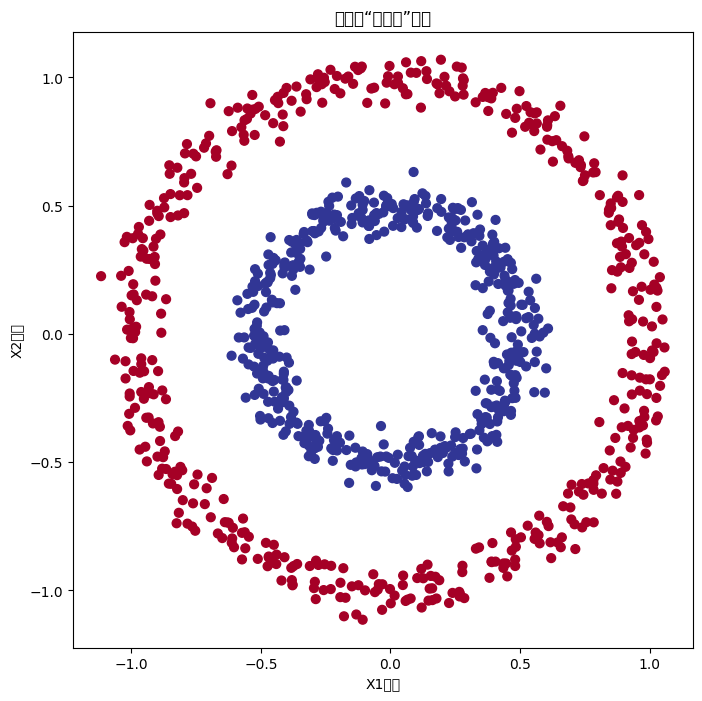

In [1]:
import torch
import matplotlib.pyplot as plt
# 引入一个能帮我们快速生成漂亮数据集的工具
from sklearn.datasets import make_circles

# --- 准备“甜甜圈”教材 ---

# 1. 使用工具生成1000个数据点
n_samples = 1000
X_numpy, y_numpy = make_circles(n_samples, noise=0.05, random_state=42, factor=0.5)

# 2. 把数据从Numpy格式转换成PyTorch认识的Tensor格式
#    我们的AI学生只认识Tensor这种格式的教材
X = torch.from_numpy(X_numpy).float()
y = torch.from_numpy(y_numpy).float().view(-1, 1) # 答案y需要调整一下形状

# --- 画图看看教材长什么样 ---
def plot_data(X_data, y_data, title="我们的“甜甜圈”教材"):
    plt.figure(figsize=(8, 8))
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.RdYlBu, s=40)
    plt.title(title)
    plt.xlabel("X1坐标")
    plt.ylabel("X2坐标")
    plt.show()

plot_data(X, y)


--- “老学生”的考试结果 ---


/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.

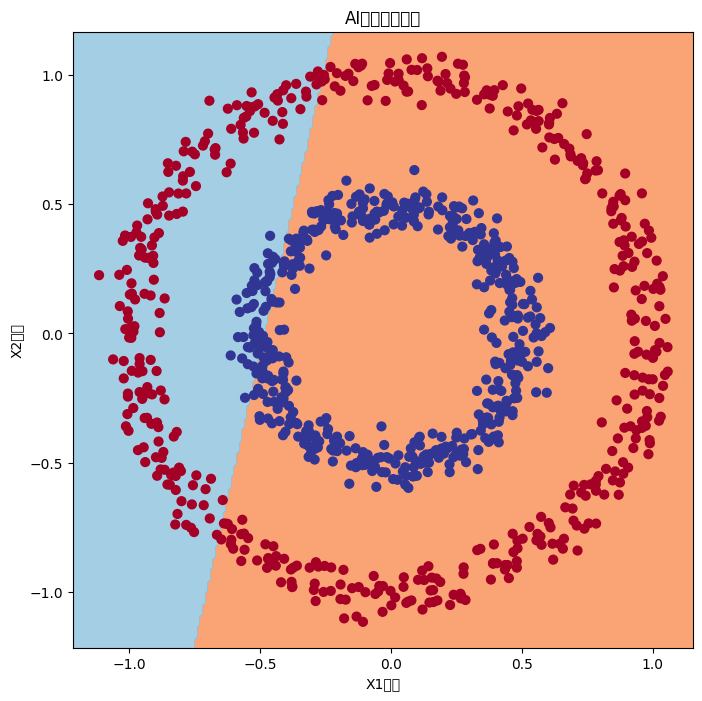

In [2]:
from torch import nn

# --- 让只会画直线的“老学生”来挑战 ---
# 这个学生的大脑结构和上一节课完全一样
model_simple = nn.Sequential(
    nn.Linear(2, 1), # 输入是2个数字(X1, X2坐标), 输出是1个数字
    nn.Sigmoid()
)

# 教学方法也完全一样
loss_fn = nn.BCELoss()
# 我们换一个更强大的“反思方法”Adam，它通常学得更快
optimizer = torch.optim.Adam(model_simple.parameters(), lr=0.1)

# --- 快速给他上100节课 ---
for epoch in range(100):
    y_pred = model_simple(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# --- 看看他的考试结果 ---
print("--- “老学生”的考试结果 ---")

# 这是一个画出AI决策边界的函数，非常有用
def plot_decision_boundary(model, X_data, y_data):
    # 确定画图的范围
    x_min, x_max = X_data[:, 0].min() - 0.1, X_data[:, 0].max() + 0.1
    y_min, y_max = X_data[:, 1].min() - 0.1, X_data[:, 1].max() + 0.1
    # 生成网格点
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01), torch.arange(y_min, y_max, 0.01))

    # 把网格点喂给模型，让它对每个点进行预测
    grid_tensor = torch.cat([xx.ravel().view(-1, 1), yy.ravel().view(-1, 1)], dim=1)
    Z = model(grid_tensor)
    Z = Z.view(xx.shape) > 0.5 # 以50%的信心作为分界

    # 画出背景颜色和数据点
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.RdYlBu, s=40)
    plt.title("AI画出的分界线")
    plt.xlabel("X1坐标")
    plt.ylabel("X2坐标")
    plt.show()

plot_decision_boundary(model_simple, X, y)


In [3]:
# --- 创造一个拥有“神经网络大脑”的新学生 ---

# 这个大脑比之前复杂了一些
model_nn = nn.Sequential(
    # 第一层：8个学生组成的团队。接收2个输入，输出8个中间结果
    nn.Linear(in_features=2, out_features=8),

    # 激活函数ReLU：这是团队协作的“秘诀”。
    # 你可以把它想象成一个开关，让团队成员的简单想法能以非线性的方式组合起来，从而创造出曲线。
    nn.ReLU(),

    # 第二层：一个“总指挥”学生。接收第一层8个学生的成果，做出最终的1个判断
    nn.Linear(in_features=8, out_features=1),

    # 最后还是用“压扁机”，把最终判断变成0到1之间的概率
    nn.Sigmoid()
)

print("--- “新学生”的大脑结构 ---")
print(model_nn)


--- “新学生”的大脑结构 ---
Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)


--- 开始教聪明的学生 ---
学习第 100 遍, 答题差距 (Loss): 0.6060
学习第 200 遍, 答题差距 (Loss): 0.5190
学习第 300 遍, 答题差距 (Loss): 0.1877
学习第 400 遍, 答题差距 (Loss): 0.0820
学习第 500 遍, 答题差距 (Loss): 0.0492
学习第 600 遍, 答题差距 (Loss): 0.0340
学习第 700 遍, 答题差距 (Loss): 0.0255
学习第 800 遍, 答题差距 (Loss): 0.0200
学习第 900 遍, 答题差距 (Loss): 0.0163
学习第 1000 遍, 答题差距 (Loss): 0.0136
--- 教学结束 ---


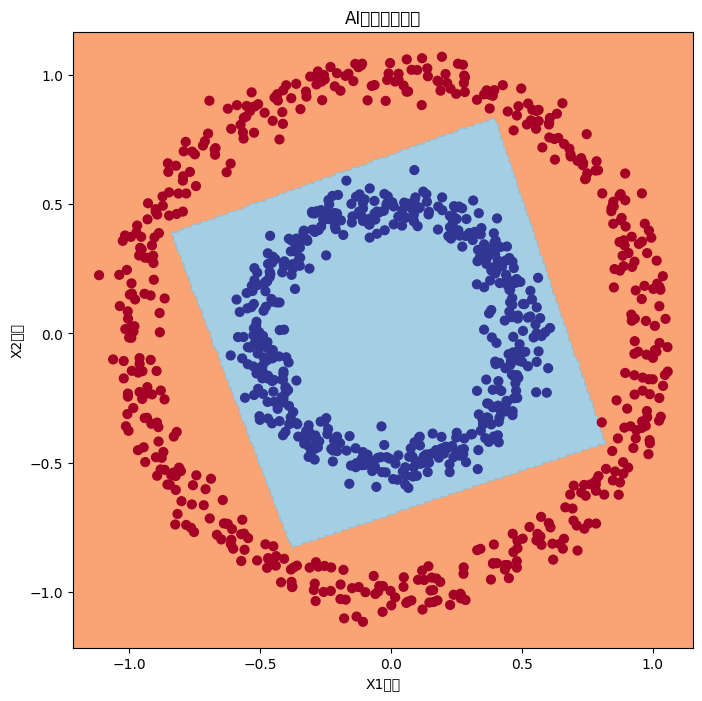

In [4]:
# --- 用同样的方法教新学生 ---

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_nn.parameters(), lr=0.01) # 学习率调小一点，慢慢学

# --- 这次多上几节课，因为问题更难了 ---
epochs = 1000
print("--- 开始教聪明的学生 ---")

for epoch in range(epochs):
    y_pred = model_nn(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"学习第 {epoch+1} 遍, 答题差距 (Loss): {loss.item():.4f}")

print("--- 教学结束 ---")

# --- 看看新学生的毕业作品 ---
plot_decision_boundary(model_nn, X, y)
